

**Создаём модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

----

**Читаем файл с данными.**

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных

**Проанализируем, есть ли в наборе данных отсутствующие значения, и создадим статистический отчёт о числовых колонках, как показано ниже.**

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Визуализации данных

**Нарисуем график bar plot, показывающий количество точек для каждого значения target.**

<AxesSubplot:xlabel='target', ylabel='count'>

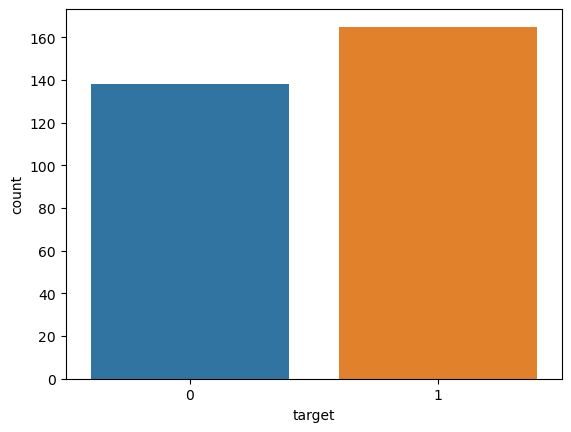

In [7]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df['target'])

**Нарисуем график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

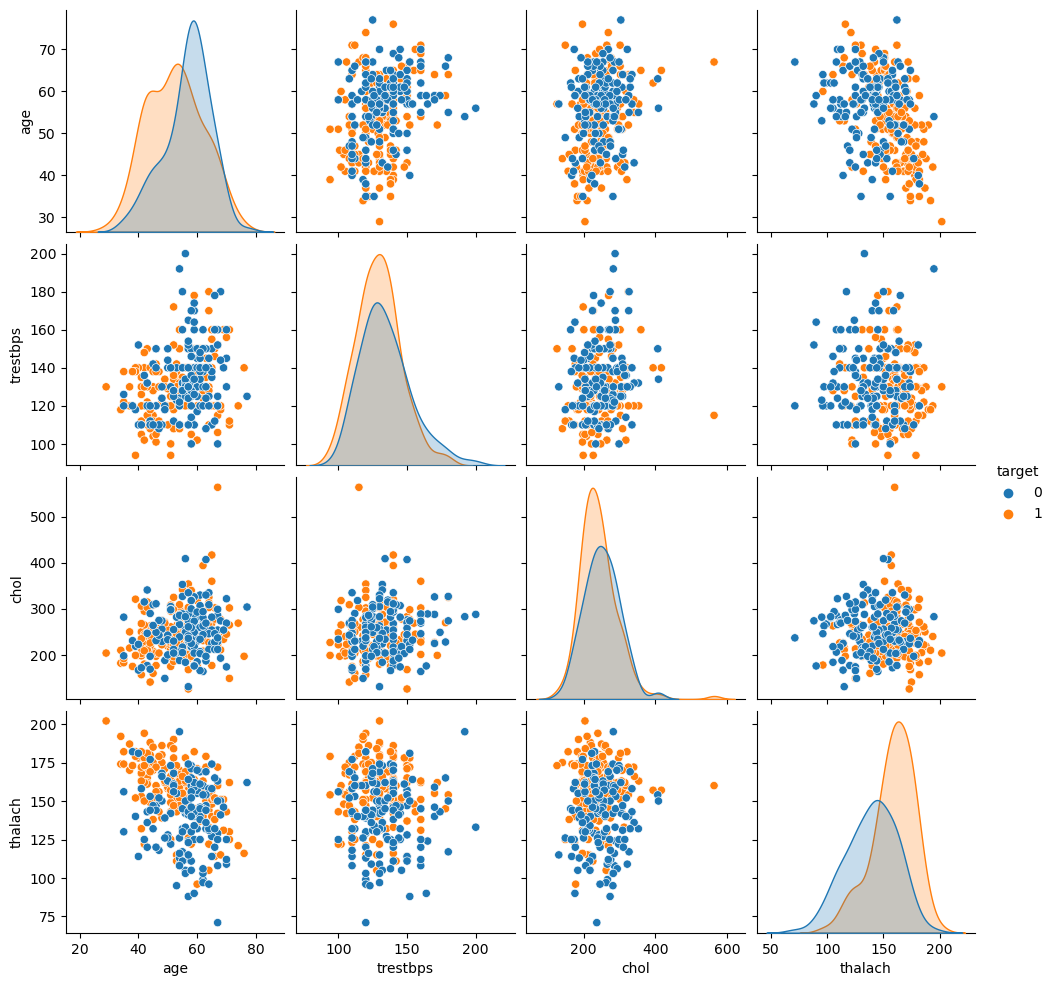

In [8]:

sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Нарисуем график heatmap, показывающий корреляции между всеми колонками.**

<AxesSubplot:>

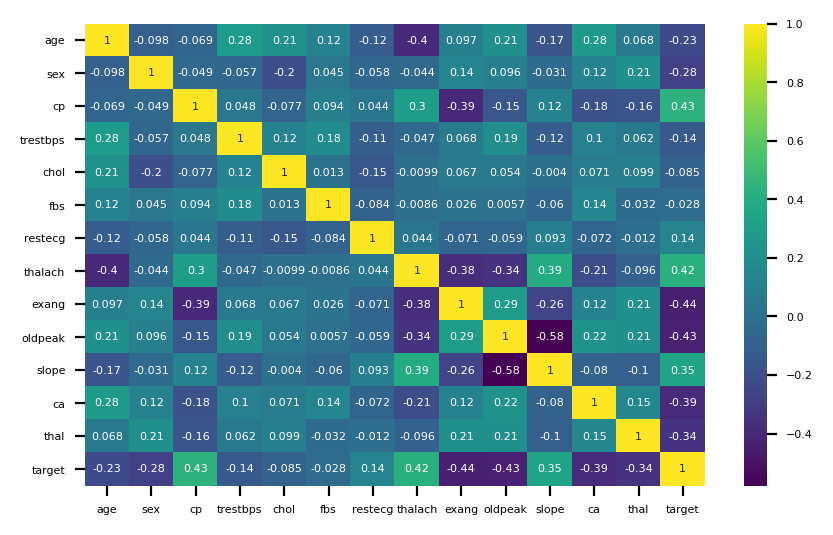

In [10]:
plt.figure(figsize=(5,3),dpi=200)
plt.rcParams.update({'font.size': 4})
sns.heatmap(df.corr(),annot=True, cmap='viridis')


----
----

# Машинное обучение

## Разбиваем на обучающий и тестовый наборы данных, а также масштабируем данные

**Разделим все признаки на 2 объекта, X и y.**

In [11]:
X = df.drop('target',axis=1)
y = df['target']


**Разбиваем данные на обучающий и тестовый наборы данных. Для тестовых данных используем размер 10% и значение random_state=101.**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**С помощью объекта StandardScaler нормализуем данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедимся, что Мы проводим обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [14]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**Создаём модель логистической регрессии, и с помощью кросс-валидации найдём хорошее значение C. У Нас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*. Мы используем более простой способ с использованием *LogisticRegressionCV*.**

In [15]:
from sklearn.linear_model import LogisticRegressionCV

In [16]:
log_model=LogisticRegressionCV()

In [17]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [18]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV

In [19]:
#log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=100)

In [20]:
#penalty = ['l1', 'l2']
#C = np.logspace(0, 4, 10)

In [21]:
#log_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [22]:
#log_model.fit(scaled_X_train,y_train)

In [23]:
#log_model.best_params_

**Отобразим результаты поиска оптимальных параметров, особенно значение C.** 


In [24]:
log_model.C_


array([0.04641589])

In [25]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Коэффициенты

**Отобразим коэффициенты модели.**

In [26]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**Сделаем визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно выясним, как отсортировать график!**

In [27]:
coefs= pd.Series(index=X.columns, data=log_model.coef_[0])
coefs=coefs.sort_values()

<AxesSubplot:>

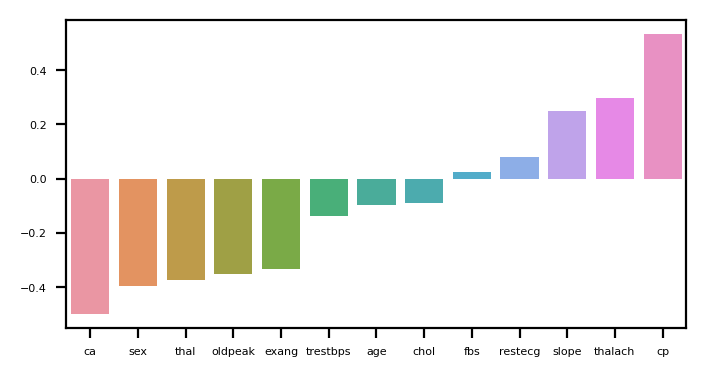

In [28]:
plt.figure(figsize=(4,2),dpi=200)
sns.barplot (x=coefs.index, y=coefs.values) 

---------

## Оценка модели

**Оценим работу модели на оставшихся 10% данных - тестовом наборе данных.**

**Подготовим следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [46]:
y_pred = log_model.predict(scaled_X_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

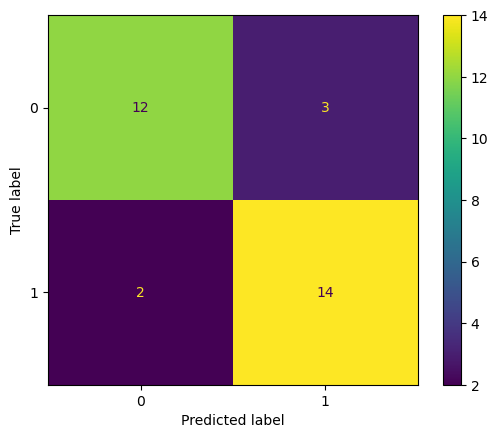

In [48]:

plt.rcParams.update({'font.size': 10})
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [33]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Кривые производительности

**Нарисуем графики "precision recall curve" и "ROC Curve".**

In [52]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

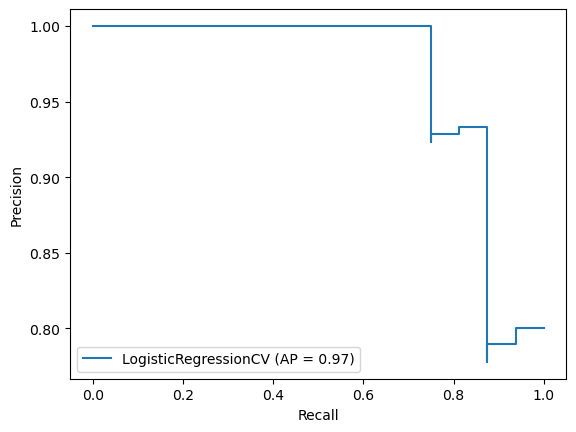

In [53]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)


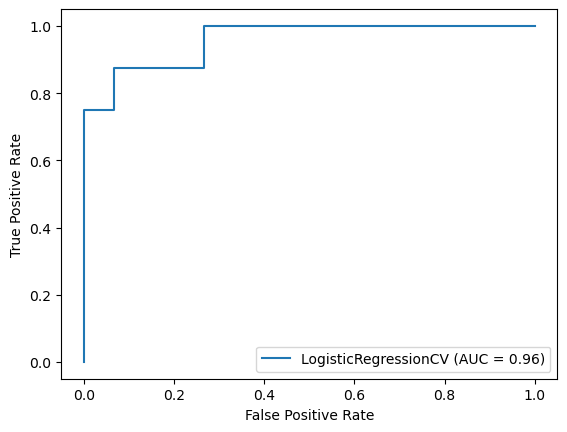

In [54]:
plot_roc_curve(log_model,scaled_X_test,y_test)

**Финальная проверка: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          54.0
    sex           1.0
    cp            0.0
    trestbps    122.0
    chol        286.0
    fbs           0.0
    restecg       0.0
    thalach     116.0
    exang         1.0
    oldpeak       3.2
    slope         1.0
    ca            2.0
    thal          2.0

**Что предскажет Наша модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

*Для удобства мы создали массив с указанными выше значениями:*

In [55]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [60]:
pd.Series(index=X.columns, data=patient[0])


age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
dtype: float64

In [56]:
prediction=log_model.predict(scaler.transform(patient))
prediction

array([0], dtype=int64)

In [58]:
log_model.predict_proba(scaler.transform(patient))

array([[0.94751173, 0.05248827]])

In [57]:
prediction[0]

0

In [41]:
## у пациента нету проблем с сердцем 0